## Load Dataset

In [123]:
import numpy as np
import pandas as pd

In [89]:
df = pd.read_csv('Housing_Price.csv')
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [91]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


## Exploratory Data Analysis

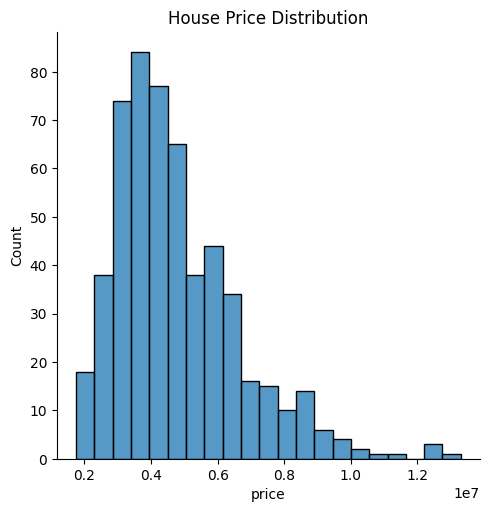

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.displot(data=df, x="price")
plt.title("House Price Distribution")
plt.show()

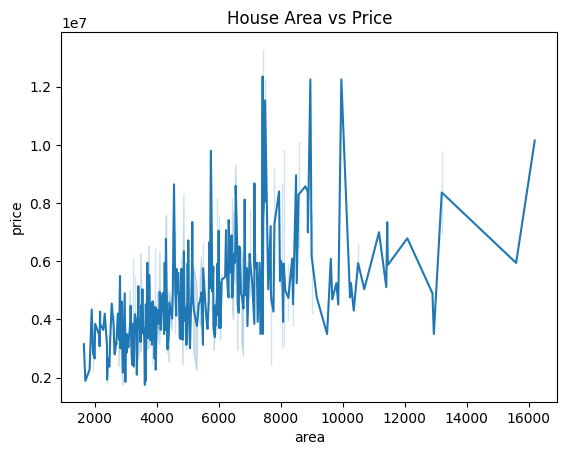

In [93]:
sns.lineplot(data=df, x="area", y="price")
plt.title("House Area vs Price")
plt.show()

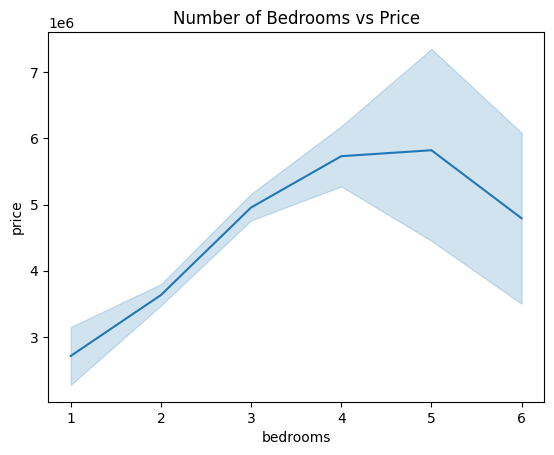

In [94]:
sns.lineplot(data=df, x="bedrooms", y="price")
plt.title("Number of Bedrooms vs Price")
plt.show()

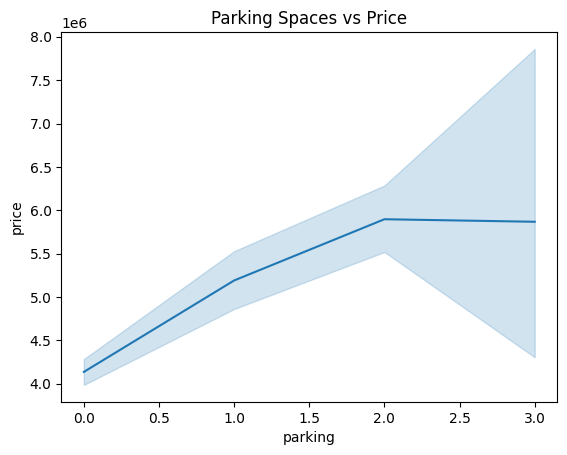

In [95]:
sns.lineplot(data=df, x="parking", y="price")
plt.title("Parking Spaces vs Price")
plt.show()

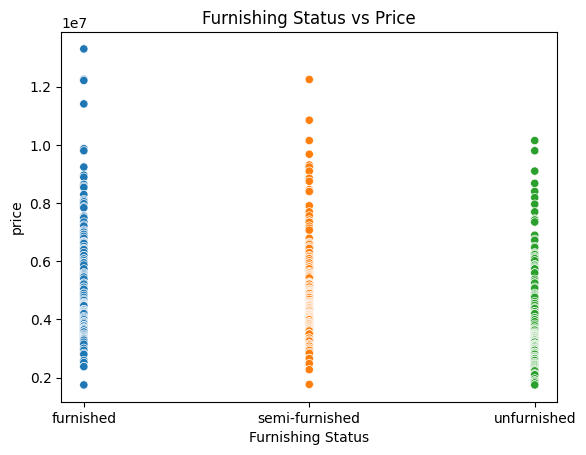

In [96]:
sns.scatterplot(data = df, x="furnishingstatus", y="price", hue="furnishingstatus", legend=False)
plt.xlabel("Furnishing Status")
plt.title("Furnishing Status vs Price")
plt.show()

## Data Preprocessing

In [97]:
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for col in binary_cols:
    df[col] = df[col].map({'yes': 1, 'no': 0})

In [98]:
# Ensure 'furnishingstatus' is treated as a string type before one-hot encoding
df['furnishingstatus'] = df['furnishingstatus'].astype(str)

# Perform one-hot encoding
try:
    df = pd.get_dummies(df, columns=['furnishingstatus'], drop_first=True)
    # drop_first=True avoids multicollinearity
except KeyError as e:
    print(f"Error applying get_dummies: {e}")
    print("Columns in DataFrame:", df.columns)
    # You might want to inspect the data in the 'furnishingstatus' column here if the error persists

In [99]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']] = scaler.fit_transform(df[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']])

In [100]:
X = df.drop('price', axis=1) # All columns except 'Price'
y = df['price'] # The target variable

In [101]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# 0.2 means 20% of data for testing, 80% for training
# random_state ensures reproducibility

## Model Training, Analysis, and Selection

In [157]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

param_grid = {
    'n_estimators': [100, 200, 300], # Coba tingkatkan jumlah pohon
    'learning_rate': [0.01, 0.05, 0.1], # Coba turunkan learning rate
    'max_depth': [3, 4, 5], # Coba kedalaman yang lebih kecil
    'subsample': [0.7, 0.8, 0.9], # Coba subsample
    'colsample_bytree': [0.7, 0.8, 0.9], # Coba colsample_bytree
    'gamma': [0, 0.1, 0.2] # Coba gamma
}
xgb = XGBRegressor(random_state=40) # Gunakan random_state yang konsisten

# Lakukan Grid Search
# cv=5 berarti 5-fold cross-validation
# scoring='r2' berarti akan mengoptimalkan berdasarkan R-squared
grid_search = GridSearchCV(estimator=xgb,
                           param_grid=param_grid,
                           scoring='r2',
                           cv=5,
                           n_jobs=-1, # Gunakan semua core CPU
                           verbose=1) # Tampilkan progress

grid_search.fit(X_train, y_train)

print(f"Best R-squared found: {grid_search.best_score_:.4f}")
print(f"Best hyperparameters: {grid_search.best_params_}")

# Ambil model terbaik
best_xgb_model = grid_search.best_estimator_

# Evaluasi model terbaik pada data test
from sklearn.metrics import r2_score
y_pred_best = best_xgb_model.predict(X_test)
test_r2 = r2_score(y_test, y_pred_best)
print(f"R-squared on test set with best model: {test_r2:.4f}")

Fitting 5 folds for each of 729 candidates, totalling 3645 fits
Best R-squared found: 0.6458
Best hyperparameters: {'colsample_bytree': 0.7, 'gamma': 0, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.7}
R-squared on test set with best model: 0.6183


In [161]:
# prompt: create instances of each model
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

linear_model = LinearRegression()
ridge_model = Ridge()
lasso_model = Lasso()
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
knn_model = KNeighborsRegressor()
xgb_model = XGBRegressor(colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=100, subsample=0.7, random_state=40)


models = {
    "Linear Regression": linear_model,
    "Ridge": ridge_model,
    "Lasso": lasso_model,
    "Random Forest": random_forest_model,
    "KNN": knn_model,
    "XGBoost": xgb_model
}

In [162]:
from sklearn.model_selection import KFold, cross_val_score

results = []
#perform kfold cross-validation using the instantiated models
for model in models.values():
    kf = KFold(n_splits=5, random_state=15, shuffle=True)
    cv_scores = cross_val_score(model, X_train, y_train, cv=kf)
    print(str(model) + " Mean R-squared: " + str(np.mean(cv_scores)))
    results.append(cv_scores)

LinearRegression() Mean R-squared: 0.6543745515516118
Ridge() Mean R-squared: 0.6556115742696326
Lasso() Mean R-squared: 0.6543746839239771
RandomForestRegressor(random_state=42) Mean R-squared: 0.6719628687553472
KNeighborsRegressor() Mean R-squared: 0.6095541775893515
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=4

/tmp/ipython-input-163-1526254989.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(results, labels=models.keys())


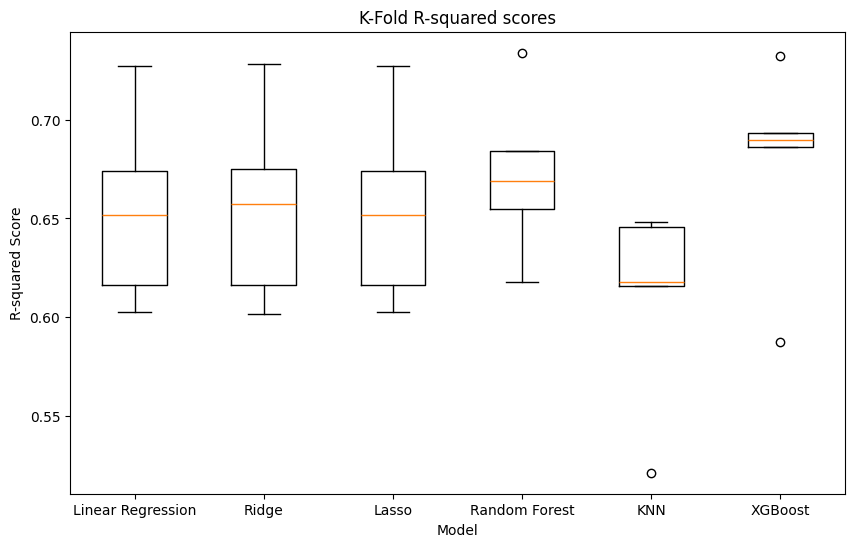

In [163]:
#plot the cross-validation results
plt.figure(figsize=(10, 6))
plt.boxplot(results, labels=models.keys())
plt.xlabel("Model")
plt.ylabel("R-squared Score")
plt.title("K-Fold R-squared scores")
plt.show()

## Further Analysis of the Selected Model

In [165]:
from sklearn.metrics import PredictionErrorDisplay

reg = XGBRegressor(colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=100, subsample=0.7, random_state=40)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

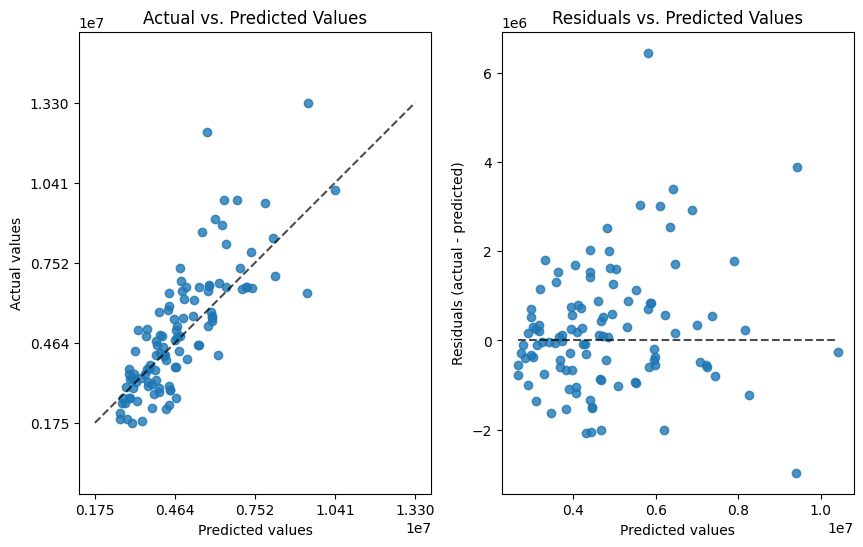

In [170]:
#create actual/predicted and residuals/predicted plots using the predictions
fig, axs = plt.subplots(ncols=2, figsize=(10, 6))
PredictionErrorDisplay.from_predictions(
    y_true=y_test,
    y_pred=y_pred,
    kind="actual_vs_predicted",
    ax=axs[0]
)
axs[0].set_title("Actual vs. Predicted Values")
PredictionErrorDisplay.from_predictions(
    y_true=y_test,
    y_pred=y_pred,
    kind="residual_vs_predicted",
    ax=axs[1]
)
axs[1].set_title("Residuals vs. Predicted Values")

plt.show()

In [169]:
from sklearn.metrics import mean_squared_error

#calculate root mean squared error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse) # Calculate RMSE by taking the square root of MSE
print("This model has a RMSE of " + str(rmse))

This model has a RMSE of 1389009.0548646543
